# Home work 3 

# Task 1

In [49]:
# загружаем необходимые пакеты
import psycopg2
import getpass
import numpy as np
import time
import pandas as pd

# соединение с базой данных
USER = input('User of database: ' )
DATABASE = input('Name of database: ' )
HOST = input('Host: ' )
PORT = input('Port: ' )
conn=psycopg2.connect(user=USER, 
                      database=DATABASE, 
                      host=HOST,
                      port=PORT,
                      password=getpass.getpass('Insert password'))

# проверка параметров
print(conn.get_dsn_parameters())

User of database: postgres
Name of database: postgres
Host: localhost
Port: 5433
Insert password········
{'user': 'postgres', 'dbname': 'postgres', 'host': 'localhost', 'port': '5433', 'tty': '', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'}


In [50]:
# запрос выводит на дату от 1 января 2010
query = """SELECT a."grade", a."not_default", b."default"
            FROM (SELECT a."grade", COUNT(a."grade") AS "not_default"
                    FROM public.ratings AS a
                    LEFT JOIN public.rating_inf AS b
                    ON a."no_rat" = b."no_rat" 
                    WHERE b."agency_id" = 'EXP' AND a."grade" != 'Снят' 
                    AND a."grade" != 'Приостановлен'
                    GROUP BY a."grade") AS a
            JOIN (SELECT a."grade", COUNT(a."grade") AS "default"
                    FROM public.ratings AS a
                    LEFT JOIN public.rating_inf AS b
                    ON a."no_rat" = b."no_rat" 
                    LEFT JOIN public.credit_events AS c
                    ON a."date" = c."date"
                    WHERE b."agency_id" = 'EXP' AND a."grade" != 'Снят' 
                    AND a."grade" != 'Приостановлен' AND c."event" = 'dft'
                    AND a."date" >= '2010-01-01'
                    GROUP BY a."grade") AS b
            ON a."grade" = b."grade"
            ORDER BY a."grade" DESC;"""

# исполнение запроса в виде датафрейма
df = pd.read_sql_query(query, conn) 
df

,grade,not_default,default
0,E,55,45
1,C++,26,4
2,C+,22,8
3,C,26,8
4,BBB,11,5
5,BB+,1,1
6,B++.mfi,20,4
7,B++,891,130
8,B+,261,48
9,B,80,13


# Task 2

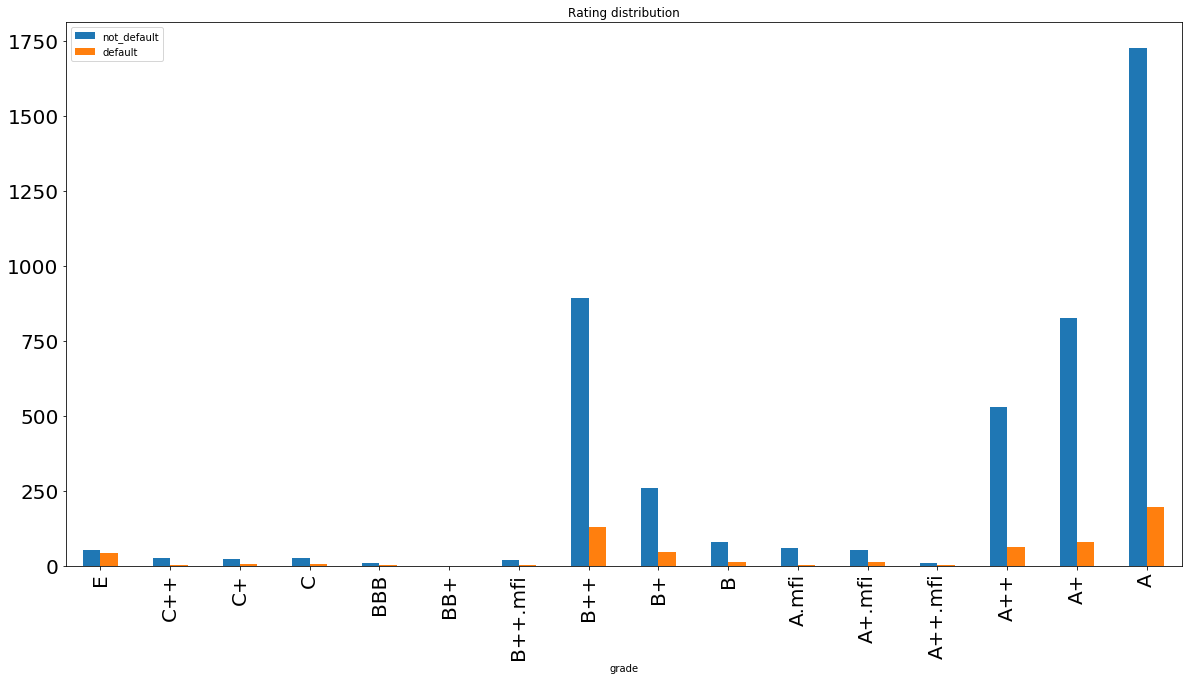

In [51]:
# задать тип рейтинга в виде индекса
df2 = df.set_index('grade')
df2.plot(kind = 'bar', figsize = [20, 10], fontsize = 20, title = 'Rating distribution')

# Task 3


In [52]:
# отсортировать в возрастающем порядке и установить индекс в виде типа рейтинга
df5 = df.sort_values(ascending=True, by = 'grade')
df6 = df5.set_index('grade')

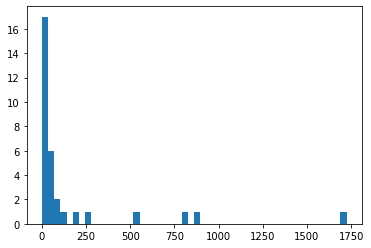

In [53]:
from matplotlib import pyplot
from numpy.random import normal
from numpy import hstack
sample = hstack((df6.T.iloc[0], df6.T.iloc[1]))
# plot the histogram
pyplot.hist(sample, bins=50)
pyplot.show()

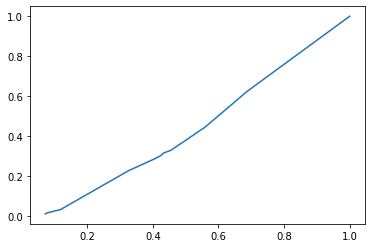

In [61]:
# построение ROC кривой
df2['default_cumulative'] = df2['default'].cumsum() / df2['default'].sum()
df2['not_default_cumulative'] = df2['not_default'].cumsum() / df2['not_default'].sum()
plt.plot(df2['default_cumulative'].values, df2['not_default_cumulative'].values)
plt.show()

# Home work 4

In [65]:
# экспорт таблицы с распределением рейтингов с 1 января 2010 года
# для дефолтных и недефолтных компаний в папку по умолчанию

auto_path = '/Users/anna/Desktop/hw4'
auto_name = 'rating_distribution_2010-01-01.csv'
filename = auto_path + '/' + auto_name
df.to_csv(filename, index = True)

In [59]:
# папка и имя файла задаются пользователем (тоже таблица)

user_path = input('Insert preferred pathway using \: ')
user_name = input('Insert preferred name: ')
filename2 = user_path + '/' + user_name + '.csv'
df.to_csv(filename2, index = True)

Insert preferred pathway using \: /Users/anna/Desktop
Insert preferred name: table_1


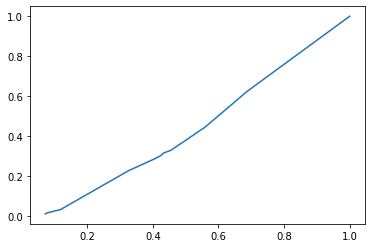

In [68]:
# экспорт рисунка ROC кривой рейтингов с 1 января 2010 года
# для дефолтных и недефолтных компаний в папку по умолчанию

path_auto_pic = '/Users/anna/Desktop/hw4'
name_auto_pic = 'ROC_2010-01-01.png'
filename3 = path_auto_pic + '/' + name_auto_pic
df2['default_cumulative'] = df2['default'].cumsum() / df2['default'].sum()
df2['not_default_cumulative'] = df2['not_default'].cumsum() / df2['not_default'].sum()
plt.plot(df2['default_cumulative'].values, df2['not_default_cumulative'].values)
pic = plt.savefig(filename3)

Insert preferred pathway using \: /Users/anna/Desktop
Insert preferred name: ROC2


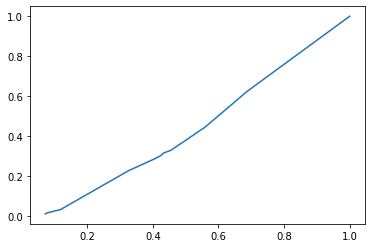

In [63]:
# экспорт рисунка ROC кривой рейтингов с 1 января 2010 года
# для дефолтных и недефолтных компаний в папку по желанию пользователя

user_path_pic = input('Insert preferred pathway using \: ')
user_name_pic = input('Insert preferred name: ')
filename4 = user_path_pic + '/' + user_name_pic + '.png'
df2['default_cumulative'] = df2['default'].cumsum() / df2['default'].sum()
df2['not_default_cumulative'] = df2['not_default'].cumsum() / df2['not_default'].sum()
plt.plot(df2['default_cumulative'].values, df2['not_default_cumulative'].values)
pic2 = plt.savefig(filename4)

In [67]:
import os
current_path = os.getcwd()
current_path

'/Users/anna'

In [78]:
# формирование отчета

from __future__ import print_function
from jinja2 import Environment, FileSystemLoader
from weasyprint import HTML, Document
import os

env = Environment(loader=FileSystemLoader('.'))
template = env.get_template("myreport.html") 
template_vars = {"title": "Отчет составлен Постниковой Дианой Евгеньевной",
                "INTRO": "Данный отчет содержит оценки разделяющей способности \
                рейтингов на горизонте риска c 1 января 2010 года}", 
                 "TABLE_DESC": "В таблице представлено распределение рейтингов по \
                 типу компаний (дефолтные/недефолтные) с 01 января 2010", 
                 "TABLE": df.to_html(), 
                 "IMAGE_DESC": "На рисунке представлена ROC кривая рейтингов с \
                 01 января 2010", 
                 "IMAGE": os.path.realpath('/Users/anna/Desktop/hw4/ROC_2010-01-01.png')
                }

# Собираем и печатаем репорт

html_out = template.render(template_vars, presentational_hints=True)
HTML(string=html_out).write_pdf('my_report.pdf', presentational_hints=True)

# Можно добавлять стилевые настройки, но это уже развлечение of the class.

OSError: no library called "cairo" was found
no library called "libcairo-2" was found
cannot load library 'libcairo.so': dlopen(libcairo.so, 2): image not found
cannot load library 'libcairo.2.dylib': dlopen(libcairo.2.dylib, 2): image not found
cannot load library 'libcairo-2.dll': dlopen(libcairo-2.dll, 2): image not found

# проблемы с установкой weasyprint (код для отчета выше)

In [71]:
pip install --upgrade pip setuptools

     |████████████████████████████████| 1.4MB 1.5MB/s eta 0:00:01
     |████████████████████████████████| 583kB 2.4MB/s eta 0:00:01
  Found existing installation: pip 19.1.1
    Uninstalling pip-19.1.1:
      Successfully uninstalled pip-19.1.1
  Found existing installation: setuptools 41.6.0
    Uninstalling setuptools-41.6.0:
      Successfully uninstalled setuptools-41.6.0
Note: you may need to restart the kernel to use updated packages.


In [77]:
pip3 install WeasyPrint

SyntaxError: invalid syntax (<ipython-input-77-b3c1dfe0b30d>, line 1)